###Predcitng the temprature on a particuar day , by considering other parametrs. We are perfroming Elastic net Regression with Gradient Descent.</br>Cost function to mesaure the loss is plotted and also to get the idea of taking steps for tuning the hyper paramters. The idea of suitable and effecient learning rate can also be found from same graph.

In [ ]:
class ElasticGradientDescendent:

  def __init__(self,gama = 0 , lasso = 0 , ridge = 0):
    self.lasso = lasso
    self.ridge = ridge
    self.gama = gama
    self.count = []
    self.cost = []


  def fit(self, X, y, x0, alpha, h, tolerance, maxIterations):
        self.n = X.shape[0]
        self.d = X.shape[1]
        self.h = h
        self.alpha = alpha
        self.x0 = x0
        self.data = np.hstack((np.ones([self.n, 1]), X))
        
       
        self.outputs = y
        
       
        X = self.data
        L = lambda beta: ((X @ beta).T - y.T) @ (X @ beta - y) + self.lasso * np.linalg.norm(beta, ord=1) + self.ridge * np.linalg.norm(beta, ord=2)
        self.beta = self.gradientDescendent(L, self.x0,  self.h, self.alpha, self.gama, tolerance, maxIterations)
                
       


  def predict(self, X):

        yPredicted = np.empty([X.shape[0],1])
        
     
        X = np.hstack((np.ones([X.shape[0],1]), X))
        

        for row in range(X.shape[0]):
            yPredicted[row] = self.beta @ X[row,]
            
        return yPredicted
  def gradientDescendent(self, f, X0, h,  alpha, gama,  tolerance, maxIterations):
  
    x = X0
    n = len(x)
    vt = np.zeros(n)


    for counter in range(maxIterations):

              gradient = self.computeGradient(f, x, h)
             
            
              if np.linalg.norm(gradient) < tolerance:
                  print('Gradient descent took', counter, 'iterations to converge')
                  print('The norm of the gradient is', np.linalg.norm(gradient))
                
                  return x

            
              elif counter == maxIterations-1:
                  print("Gradient descent failed")
                  print('The gradient is', gradient)
             
                  return x
            
              vt = alpha*gradient + vt*gama
              x -= vt
              self.count.append(counter)
              self.cost.append(f(x))

  def computeGradient(self,f,x,h):
        n = len(x)
        gradient = np.zeros(n)

        for counter in range(n):
            xUp = x.copy()
            xUp[counter] += h
            gradient[counter] = (f(xUp) - f(x))/h

        return gradient
  # Ploting the loss function 
  def costPlot(self):
     
      plt.plot(self.count, self.cost)
      plt.show()






In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/weatherHistory.csv", sep = ",")
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [ ]:

import pandas as pd

data = pd.read_csv("/content/drive/My Drive/weatherHistory.csv", sep = ",")


#Factorizing the data in unique classes
data['Precip_New'] = data['Precip Type'].eq('rain').mul(1)
data['Summary_New']=data['Summary'].replace(data['Summary'].unique(),range(0,len(data['Summary'].unique())))


#Dropping the unwanted features
#Formatted date - I think we dont need date as we have different paramters, including humidity and pressure(this two pararameters are different in each season)
#Summary & Precip Type is already changed
#Remaining are obvious to remove
drop_features = ['Formatted Date', 'Summary', 'Precip Type', 'Visibility (km)', 'Loud Cover', 'Daily Summary']
data.drop(drop_features, axis=1, inplace=True)

#Removing values with Null/NaN
data = data.dropna(axis=0)


data_mean = data.mean()
data_std = data.std()
data_max = data.max()
data_min = data.min()

# Min-Max Normalization
data = (data-data_mean)/(data_std)


print(data.columns)

# Conversion to numpy 
data = data.to_numpy()



Index(['Temperature (C)', 'Apparent Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Pressure (millibars)',
       'Precip_New', 'Summary_New'],
      dtype='object')


Alpha :  0.01
Gradient descent took 5 iterations to converge
The norm of the gradient is 0.0


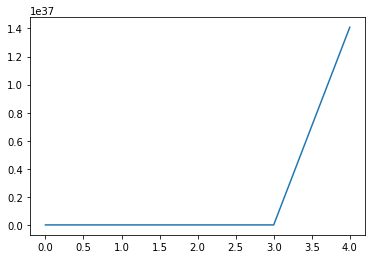

The r**2 score is -2.440865672359509e+32
The mean squared error is 2.434521296277115e+32
The mean absolute error is 1.2060648388537764e+16 

Alpha :  0.001
Gradient descent took 6 iterations to converge
The norm of the gradient is 0.0


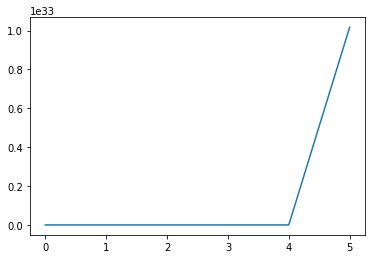

The r**2 score is -1.76222010323886e+28
The mean squared error is 1.7576396844138885e+28
The mean absolute error is 103062510933960.56 

Alpha :  0.0001
Gradient descent took 11 iterations to converge
The norm of the gradient is 0.0


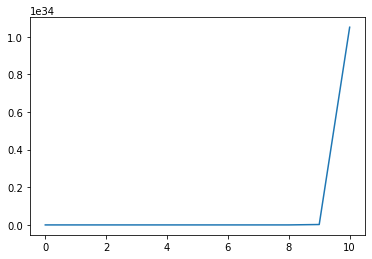

The r**2 score is -1.8195524257477727e+29
The mean squared error is 1.814822986917402e+29
The mean absolute error is 272751630685415.03 

Alpha :  1e-05
Gradient descent took 406 iterations to converge
The norm of the gradient is 7.506580303458367e-05


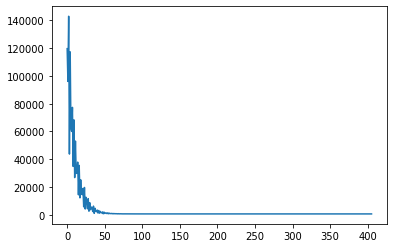

The r**2 score is 0.9901023286837182
The mean squared error is 0.009871944972599188
The mean absolute error is 0.07775167067660456 

Alpha :  1e-06
Gradient descent took 388 iterations to converge
The norm of the gradient is 8.655279996176921e-05


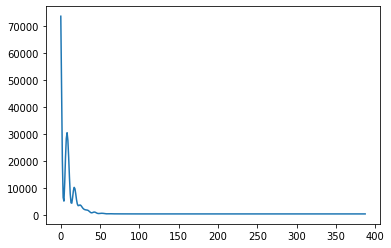

The r**2 score is 0.9901023286814019
The mean squared error is 0.009871944974909327
The mean absolute error is 0.07775167073503914 

Alpha :  1e-07
Gradient descent took 408 iterations to converge
The norm of the gradient is 9.109393939412437e-05


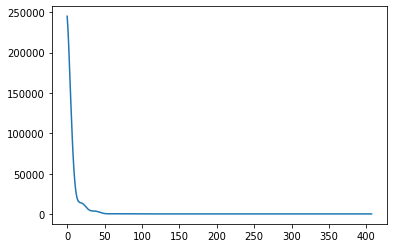

The r**2 score is 0.9901023286819826
The mean squared error is 0.009871944974330232
The mean absolute error is 0.07775167076130671 

Alpha :  1e-08
Gradient descent took 6253 iterations to converge
The norm of the gradient is 9.993068719567581e-05


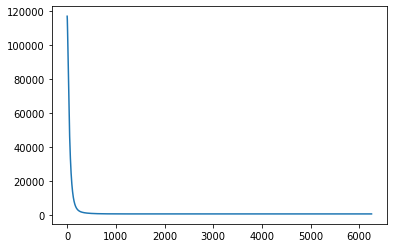

The r**2 score is 0.9901023286782317
The mean squared error is 0.009871944978071359
The mean absolute error is 0.07775167074668114 



In [ ]:

#Input in X and Output in Y
X = np.array(data[:,1:], dtype=float)
Y = np.array(data[:,0], dtype=float)





#Bifurcating the data into 60% - Training , 20% - Testing and 20% - Validation
(trainX, valX, trainY, valY) = train_test_split(X, Y, test_size=0.40, random_state=1)
(valX, testX, valY, testY) = train_test_split(valX, valY, test_size=0.50, random_state=1)



H = [0.01,0.001,0.0001,0.00001,0.000001,0.0000001,0.00000001]
for value in H:
  print("Alpha : ", value)
  model = ElasticGradientDescendent( gama=0.9, lasso = 10 , ridge=2 )
  initial_value = (np.random.uniform(size=trainX.shape[1]+1))
  
  #fitting the data in the model , for training the model
  model.fit(trainX, trainY, initial_value, alpha = value, h = 0.001, tolerance = 0.0001, maxIterations = 100000)
  model.costPlot()
  
  predictions = model.predict(trainX)

  parameters = model.beta


  #printing the data for analysis
  print('The r**2 score is', r2_score(trainY, predictions))
  print('The mean squared error is', mean_squared_error(trainY, predictions))
  print('The mean absolute error is', mean_absolute_error(trainY, predictions),'\n')

In [ ]:
#Using the values found in the above analysis , tuning the hyper parameters and fitting the data with trainig set

model = ElasticGradientDescendent( gama=0.9, lasso = 10 , ridge = 2)
initial_value = (np.random.uniform(size=trainX.shape[1]+1))

#Training the data with training data
model.fit(trainX, trainY, initial_value, alpha = 0.000001, h = 0.001, tolerance = 0.01, maxIterations = 100000)

predictions = model.predict(valX)

parameters = model.beta

#Testing the data with validation data
print('The r**2 score is', r2_score(valY, predictions))
print('The mean squared error is', mean_squared_error(valY, predictions))
print('The mean absolute error is', mean_absolute_error(valY, predictions),'\n')

Gradient descent took 567 iterations to converge
The norm of the gradient is 0.009986975423293349
The r**2 score is 0.9004476108610484
The mean squared error is 0.09916717198739565
The mean absolute error is 0.22885585744739334 



In [ ]:
#Perfroming cross-validation with the cross validation data

model = ElasticGradientDescendent( gama=0.9, lasso = 10 , ridge = 2)
initial_value = (np.random.uniform(size=trainX.shape[1]+1))


testX = normalize(testX)
trainX = normalize(trainX)
model.fit(trainX, trainY, initial_value, alpha = 0.000001, h = 0.001, tolerance = 0.01, maxIterations = 100000)


predictions = model.predict(testX)

parameters = model.beta

print('The r**2 score is', r2_score(testY, predictions))
print('The mean squared error is', mean_squared_error(testY, predictions))
print('The mean absolute error is', mean_absolute_error(testY, predictions),'\n')

Gradient descent took 607 iterations to converge
The norm of the gradient is 0.009875009756185677
The r**2 score is 0.8991970362903318
The mean squared error is 0.10196906155582079
The mean absolute error is 0.23093457619200208 

